In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
from keras.layers import Input, Dense, Dropout, Flatten, LeakyReLU
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K

Using TensorFlow backend.


In [3]:
np.random.seed(1000)

randomDim=100 #10*10 image     input image ki dimension

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train= (x_train.astype(np.float32)-127.5)/127.5 #Converting into standard normal distribution range from -1 to 1(normalizing)

In [6]:
X_train=X_train.reshape(60000,784) #Image is flatten

In [7]:
adam=Adam(lr=0.0002 ,beta_1=0.5)
# lr is learning rate  
# beta_1 is used for regularization     beta_1 is generally close to 1

In [8]:
generator=Sequential()
generator.add(Dense(256, input_dim=100)) #Passing random noise as input
generator.add(LeakyReLU(0.2)) # alpha=0.2 is the negative-slope coefficient

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

W1108 13:47:48.304860 140619886483264 deprecation_wrapper.py:119] From /home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1108 13:47:48.306762 140619886483264 deprecation_wrapper.py:119] From /home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1108 13:47:48.512915 140619886483264 deprecation_wrapper.py:119] From /home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1108 13:47:48.651811 140619886483264 deprecation_wrapper.py:119] From /home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [9]:
discriminator=Sequential()
discriminator.add(Dense(1024, input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
                  
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
            
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

W1108 13:47:48.772786 140619886483264 deprecation_wrapper.py:119] From /home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1108 13:47:48.783557 140619886483264 deprecation.py:506] From /home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [10]:
#Combining generator and descriminator
discriminator.trainable=False
ganInput=Input(shape=(100,))   #Functional model- image is given as input
x=generator(ganInput)          # x ki shape 784 hogii
ganOutput=discriminator(x)     # ganOutput ki shape 1 hogii

gan=Model(input=ganInput, output=ganOutput)
gan.compile(loss='binary_crossentropy',optimizer=adam)
gan.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


/home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  import sys


In [11]:
def generateAndPlot():
    num_examples=100
    noise=np.random.normal(0,1,size=[num_examples,randomDim])
    generatedImages=generator.predict(noise)
    generatedImages=generatedImages.reshape(num_examples,28,28)
    plt.figure(figsize=(10,10))
    for i in range(num_examples):
        plt.subplot(10,10,i+1)
        plt.imshow(generatedImages[i],interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.show()

In [12]:
def train(epochs=1, batchSize=128):
    m=X_train.shape[0]
    batchCount=m//batchSize #  // divide by integer--typecasting         60000/128 = 468.75 ie 468(integer)
    generateAndPlot()
    for e in range(epochs):
        print(f"Epoch:{e}")
        for _ in tqdm(range(batchCount)):
            noise=np.random.normal(0,1,size=[batchSize, 100])     # 0 is mean and 1 is standard deviation  , size is the output shape
            generatedImages=generator.predict(noise)  #Fake images are generated
            
            imageBatch=X_train[np.random.randint(0,m,size=batchSize)]  #choose any 128 images from 60000 images(real images)
            X=np.concatenate([imageBatch, generatedImages])  # Concatenate fake and real images-total 256 images
            
            yDis = np.zeros(2*batchSize) #256
            yDis[:batchSize]=0.9  #Real Images are assigned as 1 here 0.9-- One sided label smoothing
            
            discriminator.trainable=True
            dLoss=discriminator.train_on_batch(X,yDis) #Calculate loss every time
            discriminator.trainable=False
            
            noise=np.random.normal(0,1,size=[batchSize,100])
            yGan=np.ones(batchSize)
            gLoss=gan.train_on_batch(noise,yGan)
            
        if e%10==0:
            generateAndPlot()

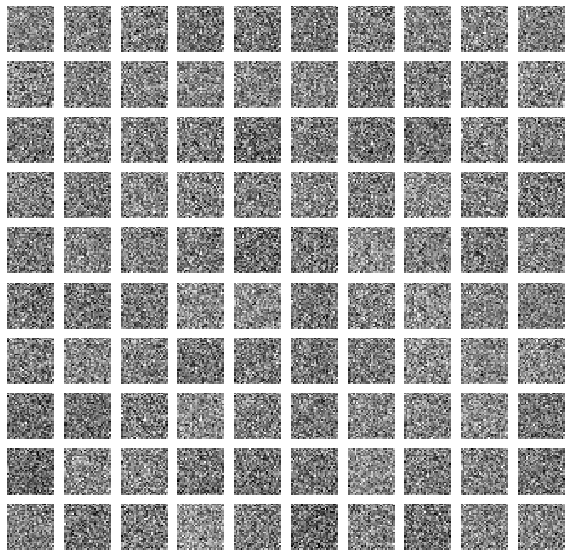

  0%|          | 0/468 [00:00<?, ?it/s]

Epoch:0


100%|██████████| 468/468 [00:34<00:00, 13.73it/s]


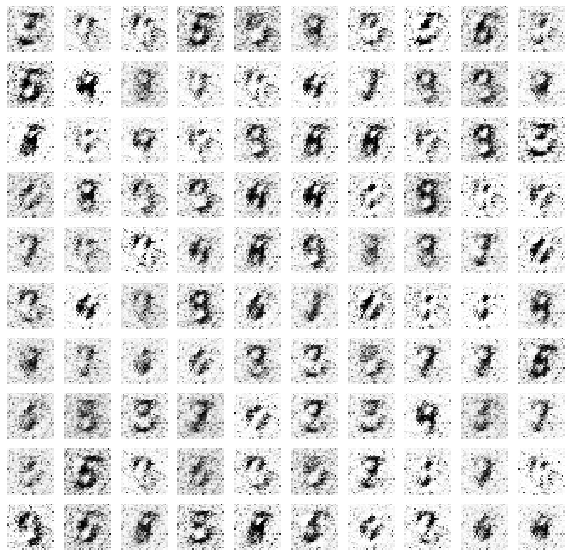

  0%|          | 2/468 [00:00<00:33, 13.86it/s]

Epoch:1


 67%|██████▋   | 312/468 [00:21<00:10, 15.19it/s]

KeyboardInterrupt: 

In [13]:
train(10)